# Objectif :
Améliorer le temps, le coût et la qualité de l’embauche dans le cadre d’un recrutement aléatoire. L’objectif est de minimiser le
temps et le coût de l’embauche et de maximiser la qualité de l’embauche. Vous
pouvez mettre en pratique ici les méthodes d’ANOVA, de corrélation et de régression linéaire multiple afin d’effectuer l’analyse prédictive avec cet ensemble de
données.

# Plan 
- (a) Présentation du problème et des objectifs de l’étude ;
- (b) Présentation des données, description rapide des données (nombre d’observations,
de variables, présence ou non de données manquantes, statistiques descriptives univariées et bivariées, etc.) ;
- (c) Préparation des données (recodages, normalisations, etc.) ;
- (d) Définition et estimation du modèle explicatif et/ou prédictif à partir des données ;
- (e) Évaluation, diagnostic et vérification de la qualité du modèle et affinage ;
- (f) Interprétation, bilan et conclusion.

In [111]:
import pandas as pd
import skimpy
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import scipy
import statsmodels.api as sm 
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
import statsmodels.stats.descriptivestats as ds
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OrdinalEncoder

import itertools
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Importation des données :

In [2]:
df = pd.read_csv('Time-Cost-Quality of Hire.csv', 
                 sep=';')

In [3]:
df.head(5)

,Sl. No,Fiscal Year,Quarter,Department,Job Open Date,Hire Date,Job Title,Source of Hire,Type of Hire,PerformanceScore,Sex,Yearly PayScale (Yen),Cost of Hire,Time to Hire (Days),Quality of Hire,Engagement,Ramp Up Time,Culture Fit (%)
0,1,2018,1,Production,04/01/2018,03/02/2018,Production Technician I,Job Boards,External,Fully Meets,F,744000,2625,30,41,45,95,47
1,2,2018,1,Production,05/01/2018,02/02/2018,Production Technician I,Agency,External,Fully Meets,F,744000,89280,28,41,82,95,47
2,3,2018,1,Production,04/02/2018,05/04/2018,Production Technician I,LinkedIn,External,Exceeds,F,660000,4000,60,41,26,85,48
3,4,2018,1,IT,04/02/2018,03/03/2018,Software Engineer,Agency,External,Fully Meets,F,960000,115200,27,41,28,85,48
4,5,2018,1,Production,04/02/2018,04/03/2018,Production Technician I,Career Portal,External,Fully Meets,M,660000,10000,28,41,34,93,51



---


## b) Présentation des données, description rapide des données (nombre d’observations, de variables, présence ou non de données manquantes, statistiques descriptives univariées et bivariées, etc.) 

- Cibles : Temps, coût et qualité d'embauche

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Sl. No                 64 non-null     int64 
 1   Fiscal Year            64 non-null     int64 
 2   Quarter                64 non-null     int64 
 3   Department             64 non-null     object
 4   Job Open Date          64 non-null     object
 5   Hire Date              64 non-null     object
 6   Job Title              64 non-null     object
 7   Source of Hire         64 non-null     object
 8   Type of Hire           64 non-null     object
 9   PerformanceScore       64 non-null     object
 10  Sex                    64 non-null     object
 11  Yearly PayScale (Yen)  64 non-null     int64 
 12  Cost of Hire           64 non-null     int64 
 13  Time to Hire (Days)    64 non-null     int64 
 14  Quality of Hire        64 non-null     int64 
 15  Engagement             64

In [5]:
df.isna().mean() * 100


Sl. No                   0.0
Fiscal Year              0.0
Quarter                  0.0
Department               0.0
Job Open Date            0.0
Hire Date                0.0
Job Title                0.0
Source of Hire           0.0
Type of Hire             0.0
PerformanceScore         0.0
Sex                      0.0
Yearly PayScale (Yen)    0.0
Cost of Hire             0.0
Time to Hire (Days)      0.0
Quality of Hire          0.0
Engagement               0.0
Ramp Up Time             0.0
Culture Fit (%)          0.0
dtype: float64

In [6]:
df.describe()

,Sl. No,Fiscal Year,Quarter,Yearly PayScale (Yen),Cost of Hire,Time to Hire (Days),Quality of Hire,Engagement,Ramp Up Time,Culture Fit (%)
count,64.000000,64.0,64.000000,6.400000e+01,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,32.500000,2018.0,2.703125,4.914450e+05,18032.500000,35.312500,79.437500,50.234375,76.812500,82.109375
std,18.618987,0.0,1.064278,2.074369e+05,31730.556101,13.033382,16.271384,21.767707,22.953282,12.812590
min,1.000000,2018.0,1.000000,1.680000e+05,2625.000000,20.000000,41.000000,26.000000,24.000000,47.000000
25%,16.750000,2018.0,2.000000,3.405000e+05,3656.250000,27.750000,81.500000,34.750000,67.250000,84.000000
50%,32.500000,2018.0,3.000000,4.773000e+05,10000.000000,31.000000,85.000000,41.000000,84.000000,85.000000
75%,48.250000,2018.0,4.000000,6.600000e+05,10000.000000,34.250000,89.000000,71.000000,91.250000,87.000000
max,64.000000,2018.0,4.000000,1.008000e+06,120960.000000,88.000000,94.000000,96.000000,105.000000,95.000000


In [7]:
skimpy.skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 64     │ │ int64       │ 10    │                                                          │
│ │ Number of columns │ 18     │ │ string      │ 8     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column                ┃ NA ┃ NA % ┃ mean   ┃ sd     ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ Sl. No                │  0 │    0 │   32.5 │  18.62 │      1 │  16.75 │   32.5 │  48.25 │      64 │ █▇█▇██ │  │
│ │ Fiscal Year           │  0 │    0 │   2018 │      0 │   2018 │   2018 │   2018 │   2018 │    2018 │     █  │  │
│ │ Quarter               │  0 │    0 │  2.703 │  1.064 │      1 │      2 │      3 │      4 │       4 │ ▄ ▆ █▇ │  │
│ │ Yearly PayScale (Yen) │  0 │    0 │ 491400 │ 207400 │ 168000 │ 340500 │ 477300 │ 660000 │ 1008000 │ ▅█▇▃▄▁ │  │
│ │ Cost of Hire          │  0 │    0 │  18030 │  31730 │   2625 │   3656 │  10000 │  10000 │  121000 │ █   ▁  │  │
│ │ Time to Hire (Days)   │  0 │    0 │  35.31 │  13.03 │     20 │  27.75 │     31 │  34.25 │      88 │  █▃▁▂  │  │
│ │ Quality of Hire       │  0 │    0 │  79.44 │  16.27 │     41 │   81.5 │     85 │     89 │      94 │ ▂▁▁▁▅█ │  │
│ │ Engagement            │  0 │    0 │  50.23 │  21.77 │     26 │  34.75 │     41 │     71 │      96 │ █▄▁▁▃▂ │  │
│ │ Ramp Up Time          │  0 │    0 │  76.81 │  22.95 │     24 │  67.25 │     84 │  91.25 │     105 │ ▃ ▃▄█▆ │  │
│ │ Culture Fit (%)       │  0 │    0 │  82.11 │  12.81 │     47 │     84 │     85 │     87 │      95 │ ▂   █▆ │  │
│ └───────────────────────┴────┴──────┴────────┴────────┴────────┴────────┴────────┴────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃           ┃           ┃           ┃           ┃ chars per ┃ words per ┃ total      ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest  ┃ longest   ┃ min       ┃ max       ┃ row       ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ Departmen │  0 │    0 │ IT        │ Productio │ IT        │ Sales     │      7.75 │         1 │         64 │  │
│ │ t         │    │      │           │ n         │           │           │           │           │            │  │
│ │ Job Open  │  0 │    0 │ 04/01/201 │ 04/01/201 │ 01/04/201 │ 11/11/201 │        10 │         1 │         64 │  │
│ │ Date      │    │      │ 8         │ 8         │ 8         │ 8         │           │           │            │  │
│ │ Hire Date │  0 │    0 │ 03/02/201 │ 03/02/201 │ 01/02/201 │ 11/06/201 │        10 │         1 │         64 │  │
│ │           │    │      │ 8         │ 8         │ 9         │ 8         │           │           │            │  │
│ │ Job Title │  0 │    0 │ Software  │ Productio │ IT  

## Variables Qualitatives
- Departement : Équipe réalisant l'embauche. 
- Job Open : Date de début de recherche d'un employé. 
- Hire Date : Date d'embauche ou date où le besoin a été rempli. 
- Job Title : Intitulé de la position. 
- Source of Hire : Canal par lequel l'employé a été trouvé. 
- Type of Hire : Fait que l'embauché soit connu de quelqu'un déjà à l'entreprise.  
- Performance Score : Fait que la personne replisse ou non les atteintes. 
- Sex : Genre de la personne embauché. 
## Variables Quantitatives 
- Sl.No : Nombre du salarié. Numéro de la ligne. 
- Fiscal Year : Année fiscale. 
- Quarter : Trimestre. 
- Yearly PayScale (Yen) : Salaire annuel en Yen.
- Cost of Hire : Coût de l'embauche. 
- Time of Hire (Days) : Temps que cela à pris d'embaucher la personne concerné.
- Quality of Hire :  Métrique de qualité de l'employé. 
- Engagement : Investissement personnel. 
- Ramp up Time : Temps de montée en puissance de l'employée. 
- Culture Fit (%) : Adaptation culturelle de l'employée. 
### Variables à changer de type : 
- Hire Date
- Job Open
### Pas d'intérêt à traiter : 
- Fiscal Year : Une seule modalité 


---


## Analyse Univarié Qualitatif
Hire Date et Job Open semble être une variable qui n'est pas catégorielle mais qui devrait \
être considérée comme numérique. Tout de même, elle semble être résumé par la durée d'embauche.\
A mon avis il existerait une certaine rédondance. 

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_51334/1668073487.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['PerformanceScore'], palette ='husl')


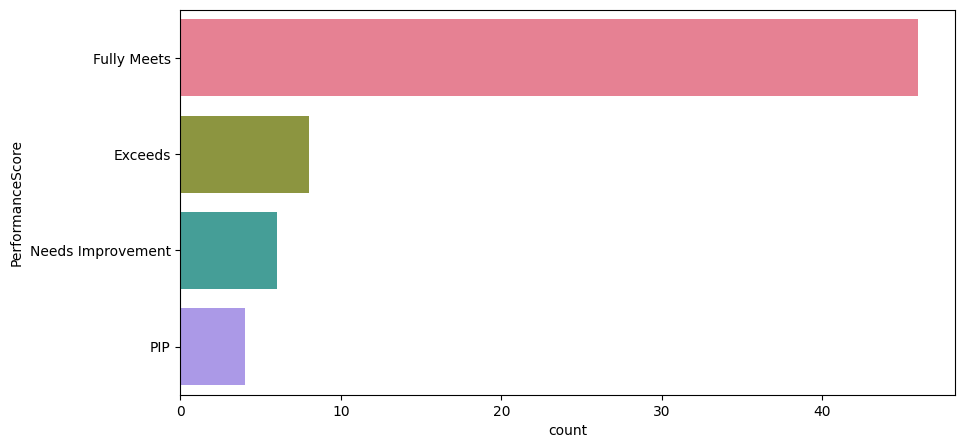

In [8]:
plt.figure(figsize =(10,5))
sns.countplot(df['PerformanceScore'], palette ='husl')
plt.show()

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_51334/3130837343.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df['Department'], palette='husl')


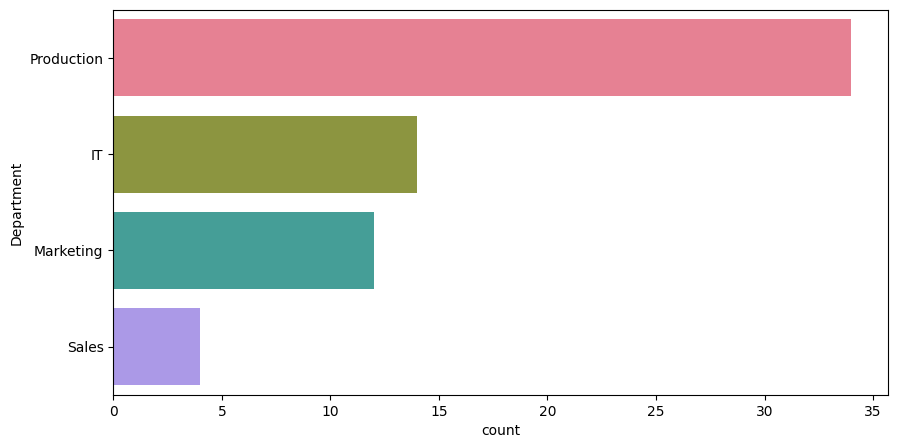

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(data=df['Department'], palette='husl')
plt.show()

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_51334/1223814154.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Job Title'], palette ='husl')


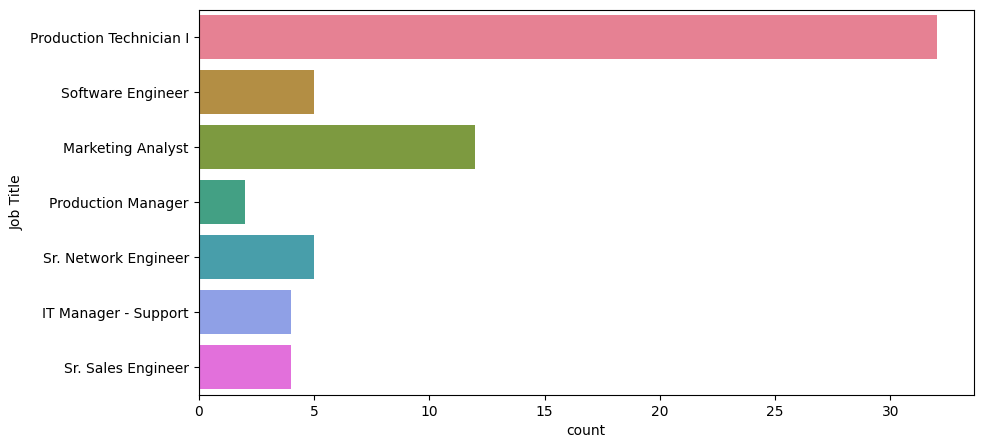

In [10]:
plt.figure(figsize =(10,5))
sns.countplot(df['Job Title'], palette ='husl')
plt.show()

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_51334/2058952572.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Source of Hire'], palette ='husl')


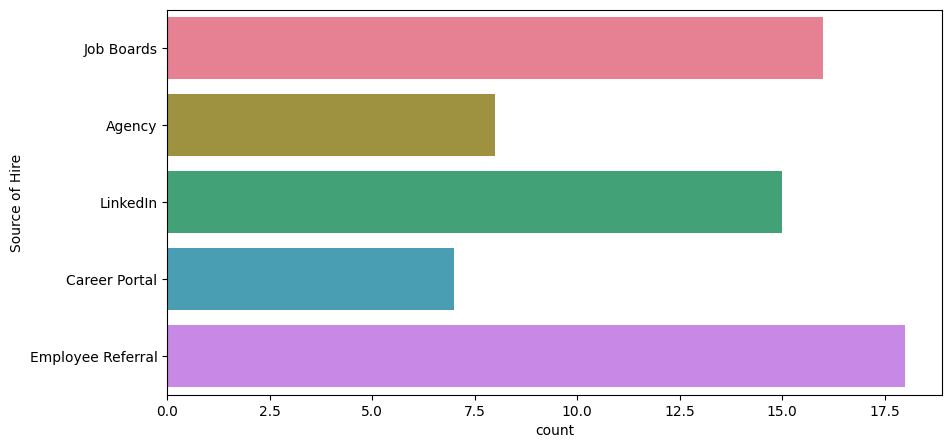

In [11]:
plt.figure(figsize =(10,5))
sns.countplot(df['Source of Hire'], palette ='husl')
plt.show()

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_51334/1052710344.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Type of Hire'], palette ='husl')


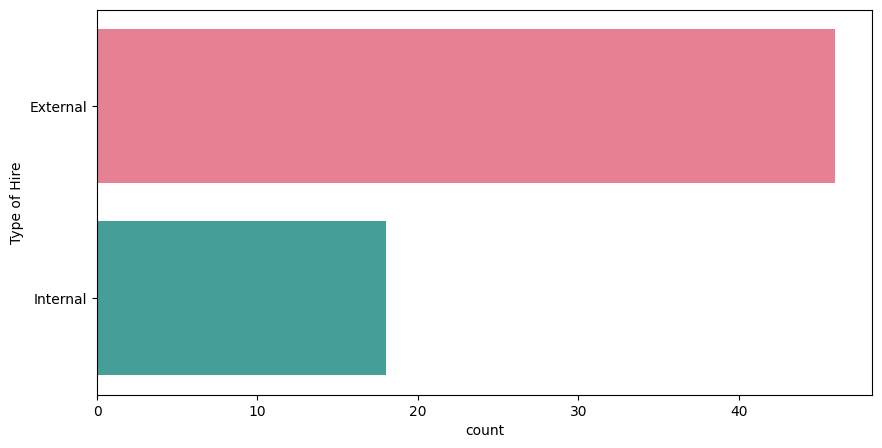

In [12]:
plt.figure(figsize =(10,5))
sns.countplot(df['Type of Hire'], palette ='husl')
plt.show()

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_51334/2560990152.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Sex'], palette ='husl')


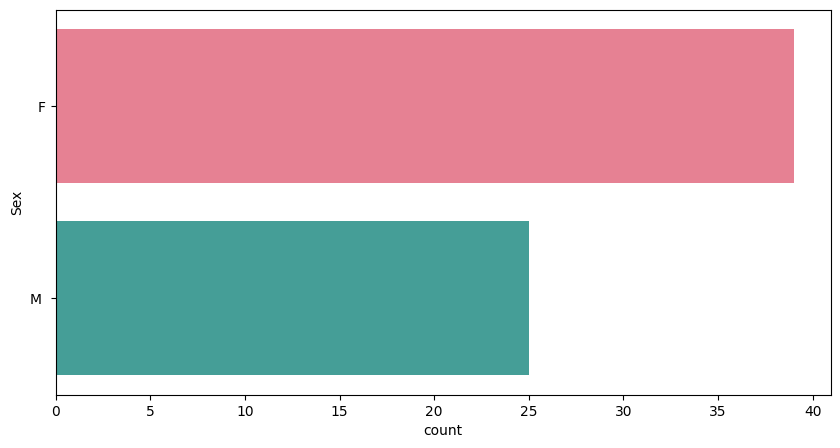

In [13]:
plt.figure(figsize =(10,5))
sns.countplot(df['Sex'], palette ='husl')
plt.show()

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_51334/1223814154.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Job Title'], palette ='husl')


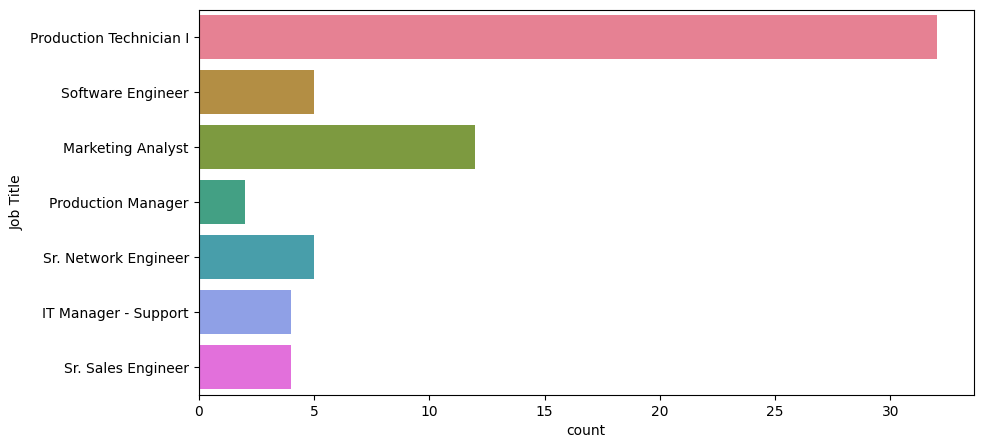

In [14]:
plt.figure(figsize =(10,5))
sns.countplot(df['Job Title'], palette ='husl')
plt.show()

## Analyse Univarié Quantitatif
Dans ces graphs nous nous rendons compte qu'ils existent des variables qui semblent être ordinales catégorielles. Celles-cis sont\
Quarter et Fiscal Year. Sl.Id présente un intérêt faible. 

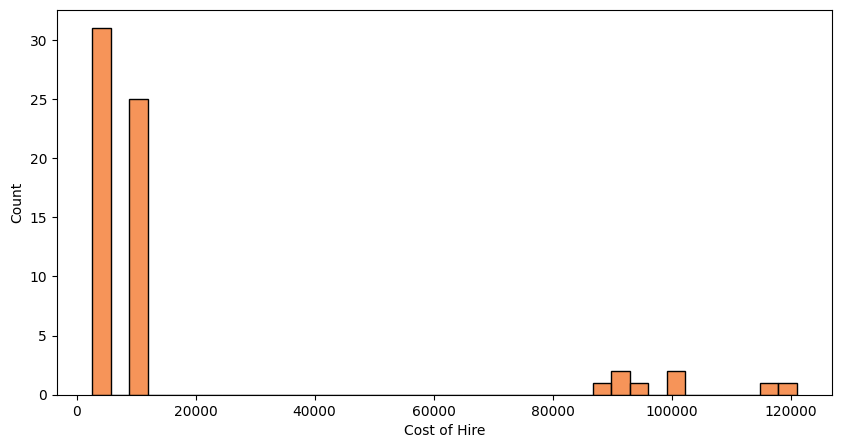

In [15]:
plt.figure(figsize = (10,5))
sns.histplot( df['Cost of Hire'], color ='#F37021')
plt.show()

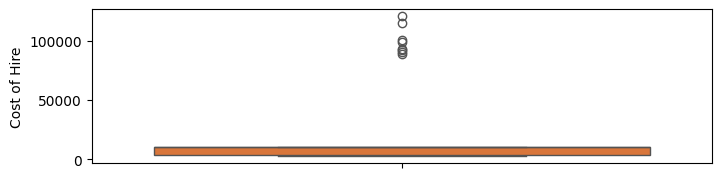

In [16]:
plt.figure(figsize=(8,2))
sns.boxplot(df['Cost of Hire'],color='#F37021')
plt.show()

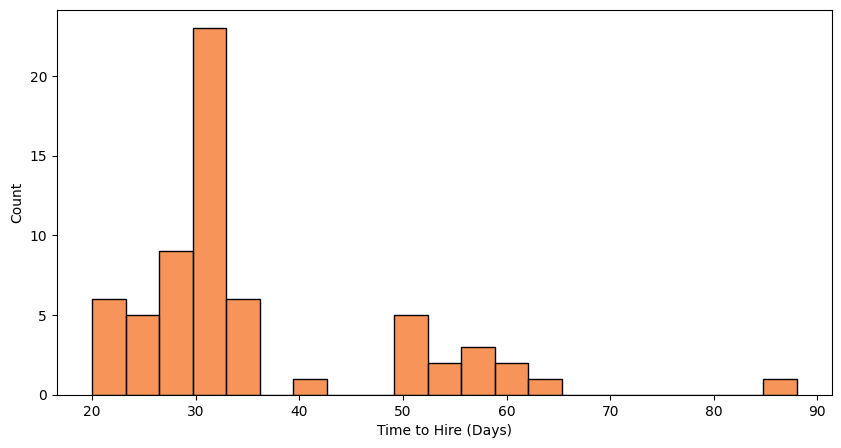

In [17]:
plt.figure(figsize = (10,5))
sns.histplot( df['Time to Hire (Days)'], color ='#F37021')
plt.show()

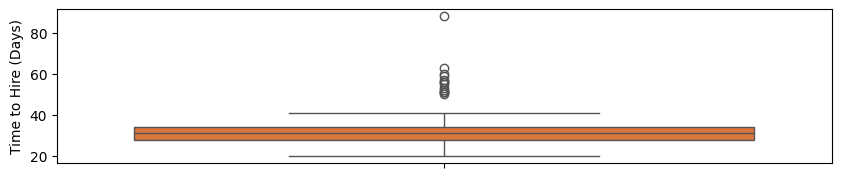

In [18]:
plt.figure(figsize=(10,2))
sns.boxplot(df['Time to Hire (Days)'], color = '#F37021')
plt.show()

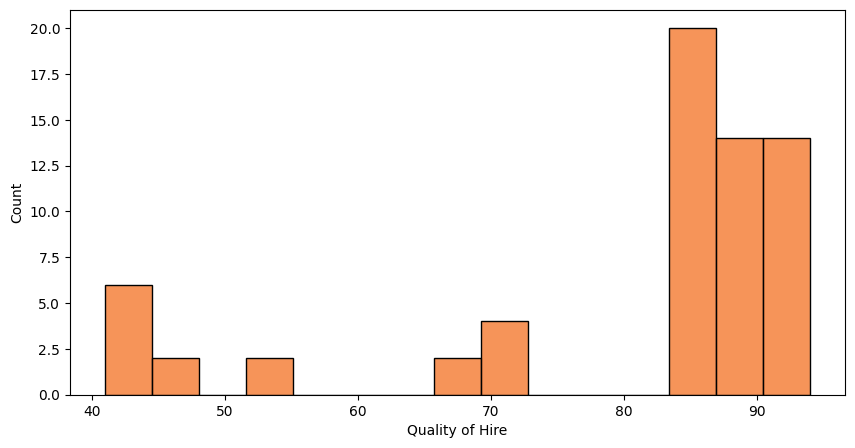

In [19]:
plt.figure(figsize = (10,5))
sns.histplot(df['Quality of Hire'], color ='#F37021')
plt.show()

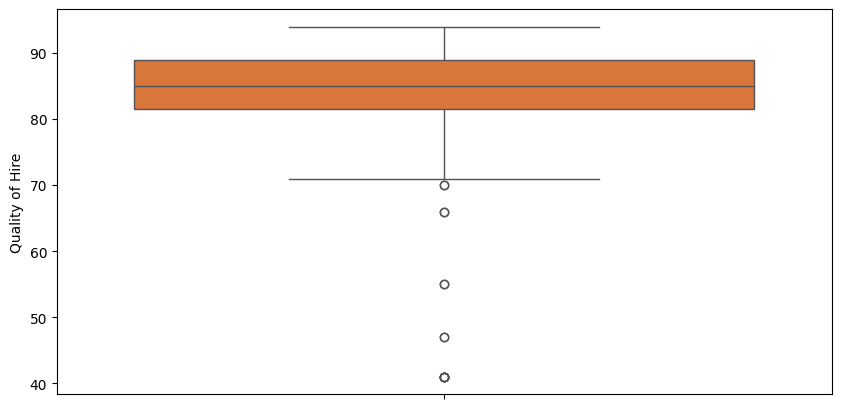

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(df['Quality of Hire'], color='#F37021')
plt.show()

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_51334/615792069.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df['Quarter'].value_counts(), palette = 'husl')


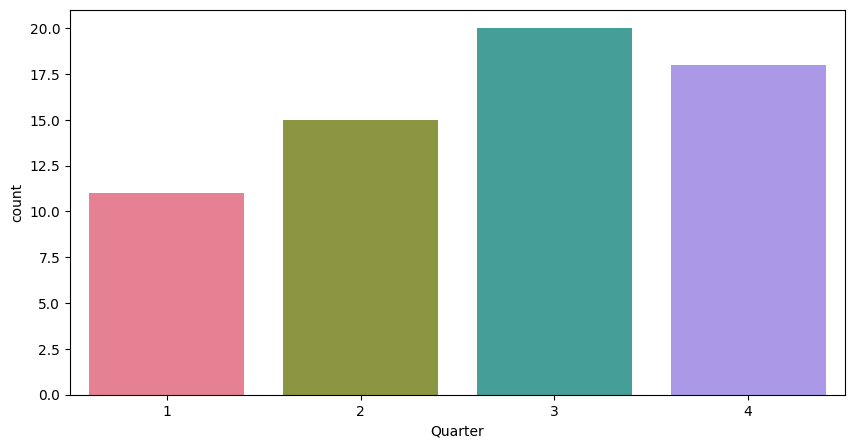

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(df['Quarter'].value_counts(), palette = 'husl')
plt.show()

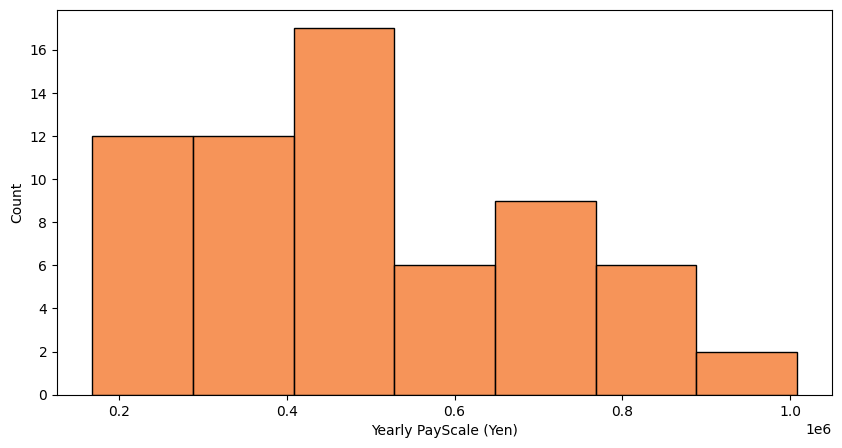

In [22]:
plt.figure(figsize = (10,5))
sns.histplot(df['Yearly PayScale (Yen)'], color = '#F37021')
plt.show()

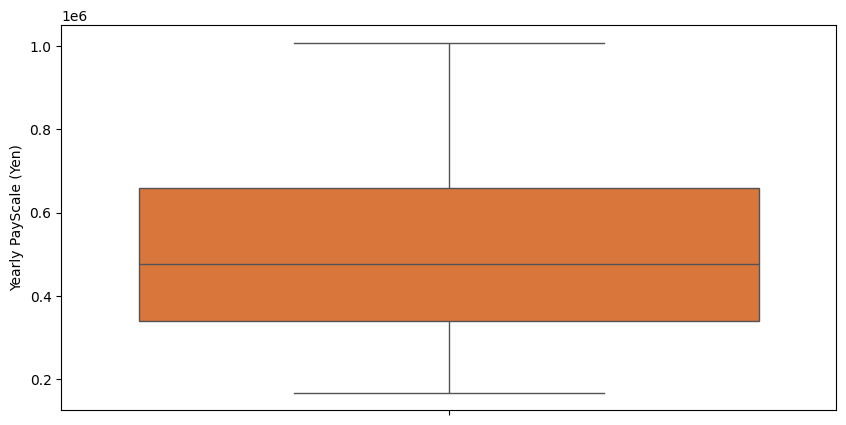

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(df['Yearly PayScale (Yen)'], color = '#F37021')
plt.show()

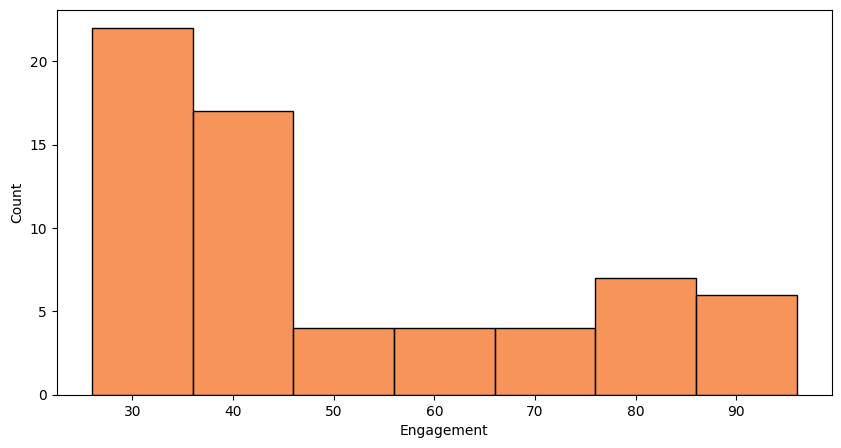

In [24]:
plt.figure(figsize=(10,5))
sns.histplot(df['Engagement'], color='#F37021')
plt.show()

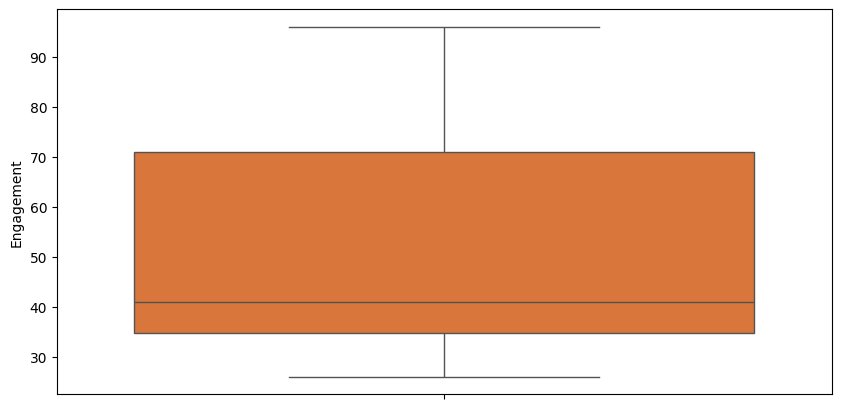

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(df['Engagement'], color = '#F37021')
plt.show()

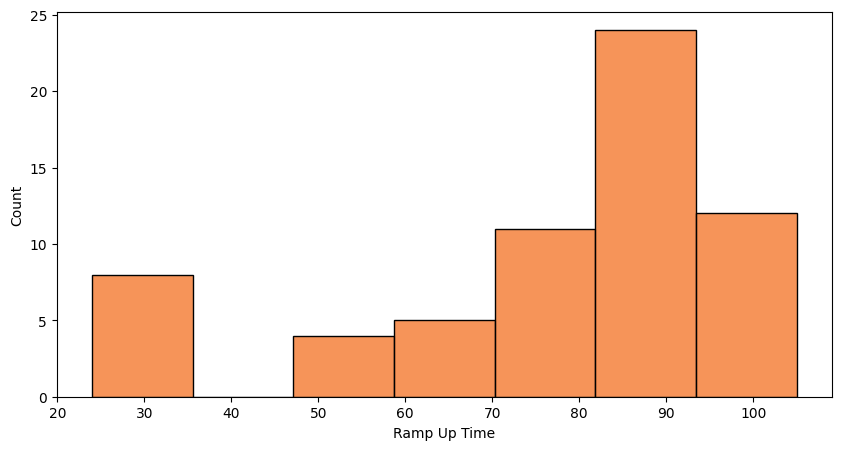

In [26]:
plt.figure(figsize = (10,5))
sns.histplot(df['Ramp Up Time'], color ='#F37021')
plt.show()

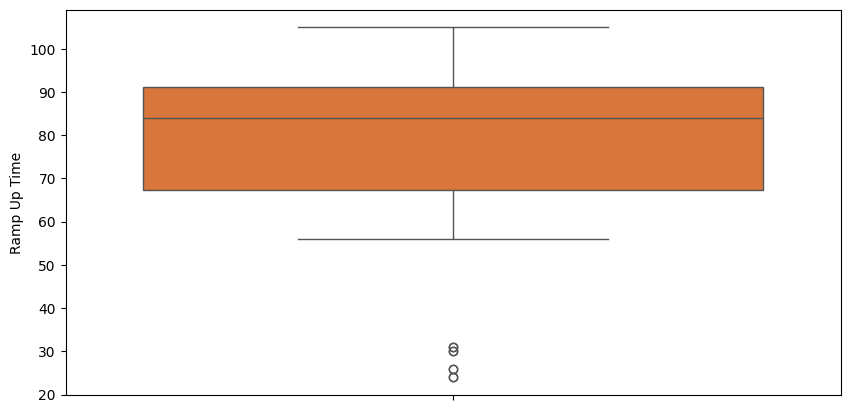

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(df['Ramp Up Time'], color ='#F37021')
plt.show()

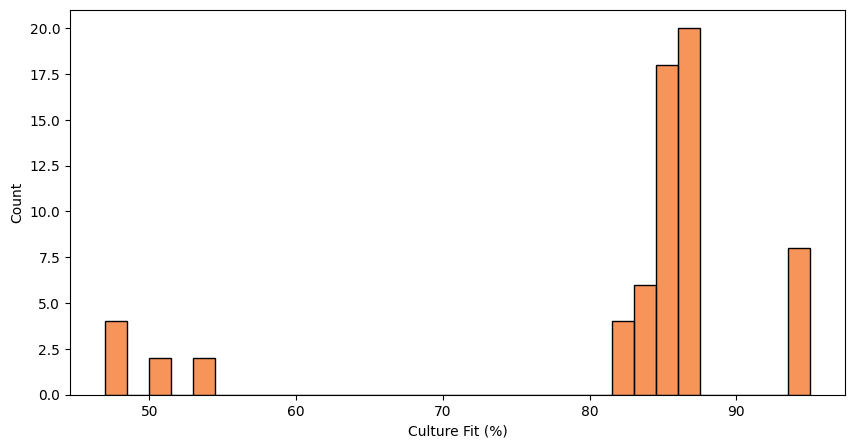

In [28]:
plt.figure(figsize=(10,5))
sns.histplot(df['Culture Fit (%)'], color ='#F37021')
plt.show()

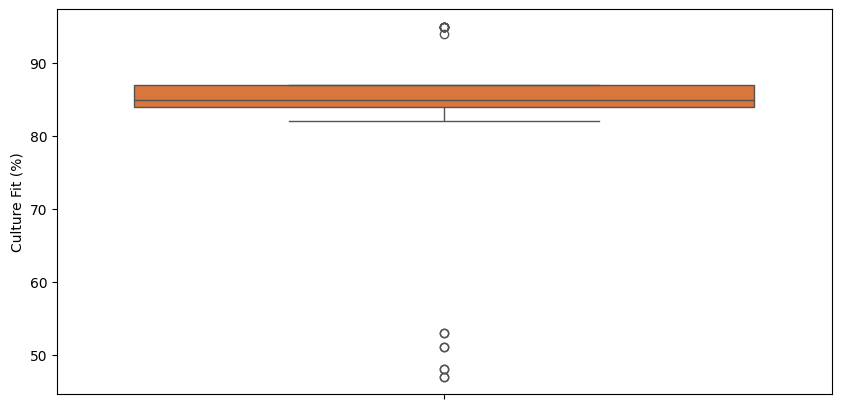

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(df['Culture Fit (%)'], color = '#F37021')
plt.show()

## Analyse Bivarié Qualitatives

In [30]:
df_quant = df.select_dtypes(exclude=int)

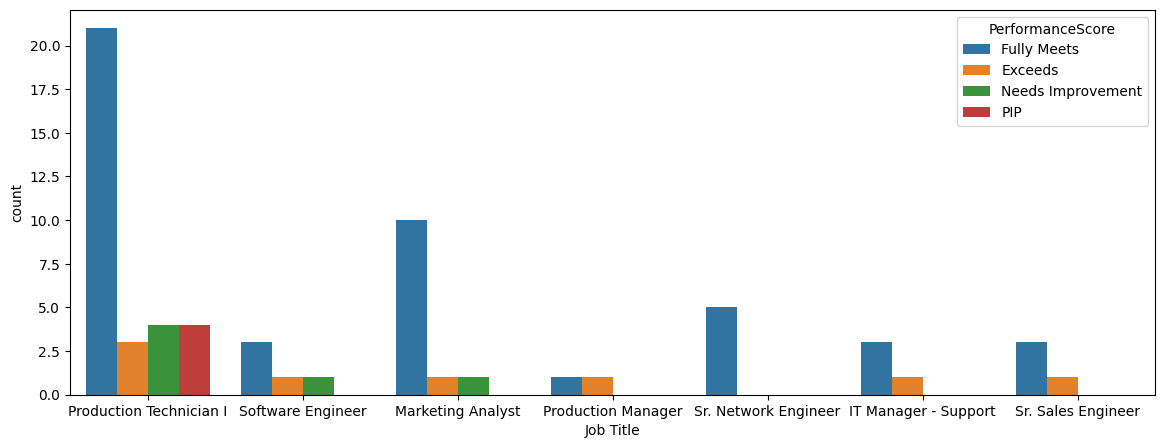

In [31]:
plt.figure(figsize = (14,5))
sns.countplot(df, x = 'Job Title', hue = 'PerformanceScore')
plt.show()

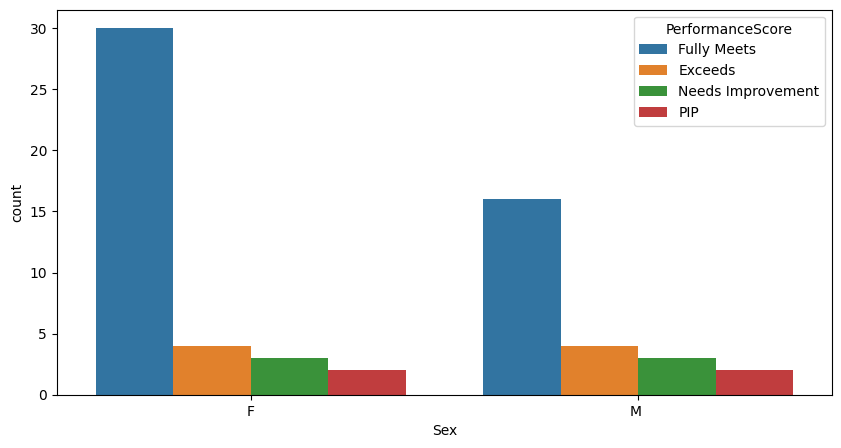

In [32]:
plt.figure(figsize = (10,5))
sns.countplot(df,x='Sex', hue='PerformanceScore')
plt.show()

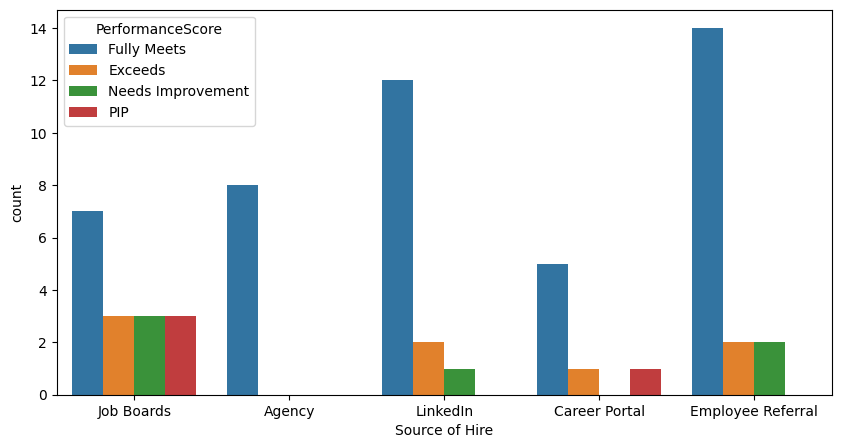

In [33]:
plt.figure(figsize = (10,5))
sns.countplot(df,x='Source of Hire', hue='PerformanceScore')
plt.show()

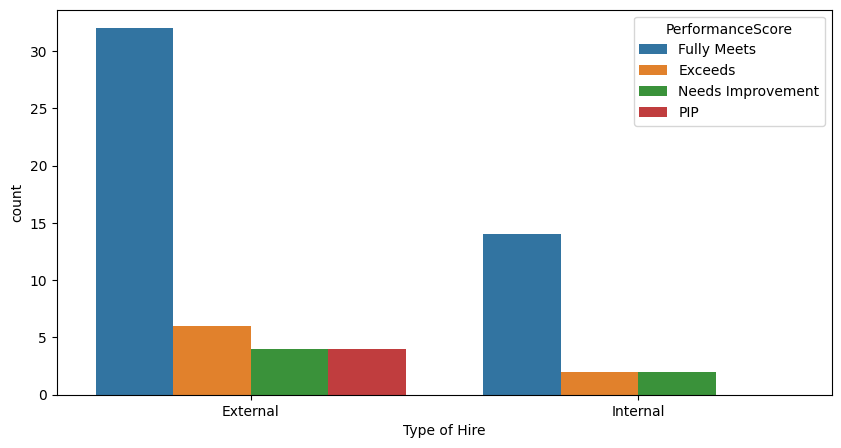

In [34]:
plt.figure(figsize = (10,5))
sns.countplot(df,x='Type of Hire', hue='PerformanceScore')
plt.show()

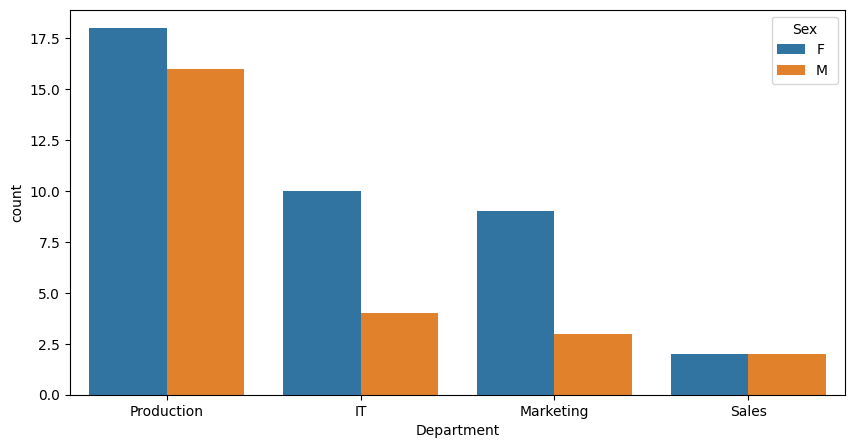

In [35]:
plt.figure(figsize = (10,5))
sns.countplot(df,x='Department', hue='Sex')
plt.show()

## Analyse Bivarié Quantitatif et Qualitatif

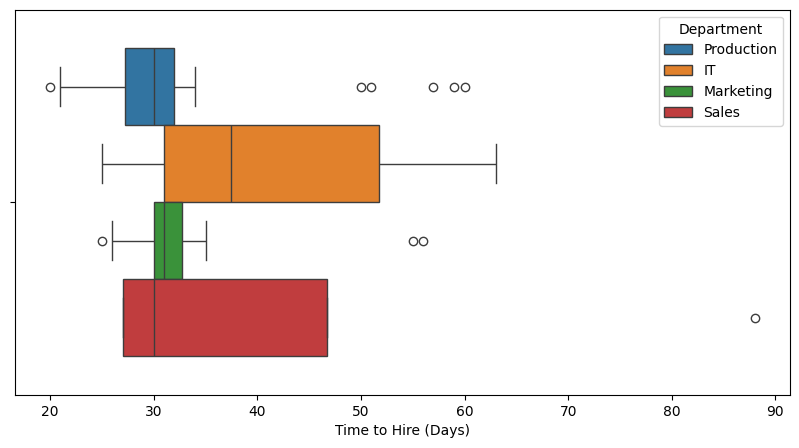

In [36]:
plt.figure(figsize =(10,5))
sns.boxplot(df, x = 'Time to Hire (Days)' , hue = 'Department')
plt.show()

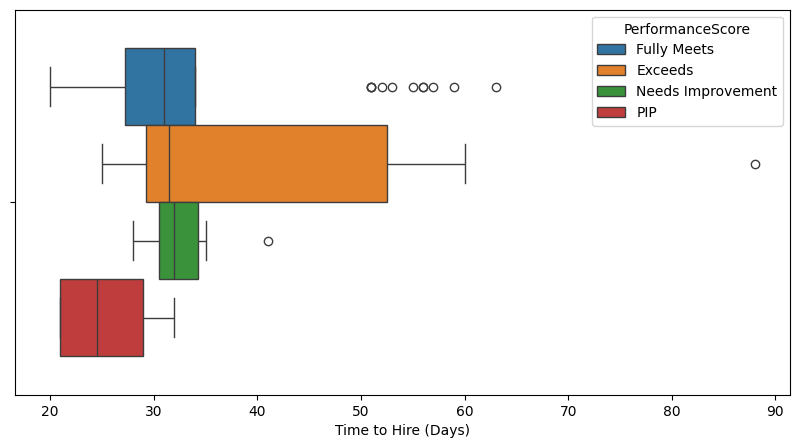

In [37]:
plt.figure(figsize =(10,5))
sns.boxplot(df, x ='Time to Hire (Days)', hue = 'PerformanceScore')
plt.show()

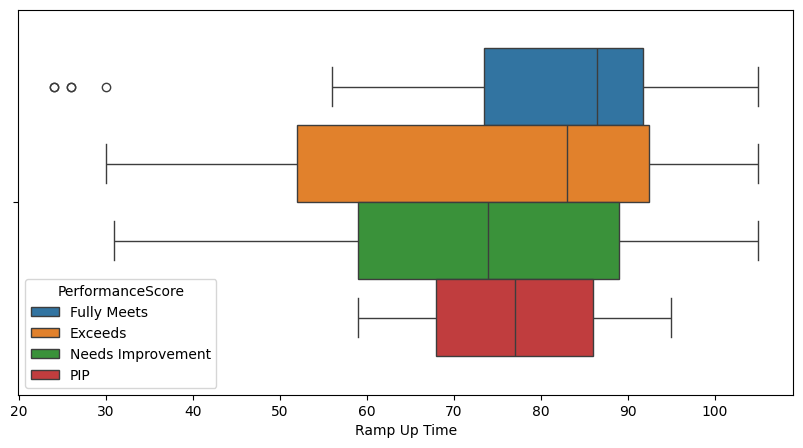

In [38]:
plt.figure(figsize =(10,5))
sns.boxplot(df, x ='Ramp Up Time', hue = 'PerformanceScore')
plt.show()

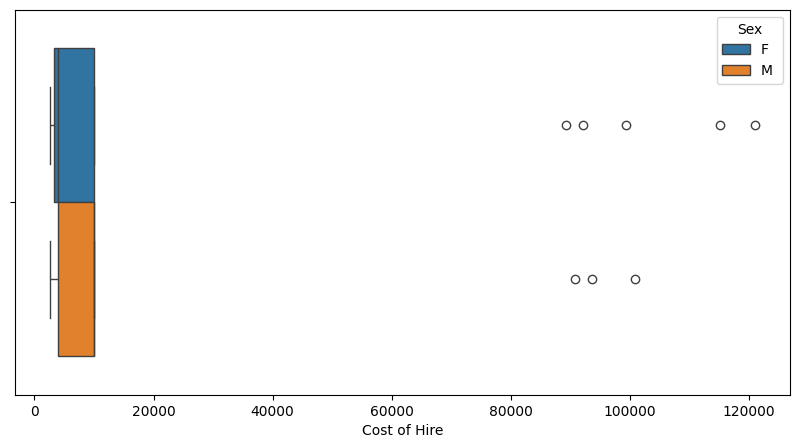

In [39]:
plt.figure(figsize =(10,5))
sns.boxplot(df, x ='Cost of Hire', hue = 'Sex')
plt.show()

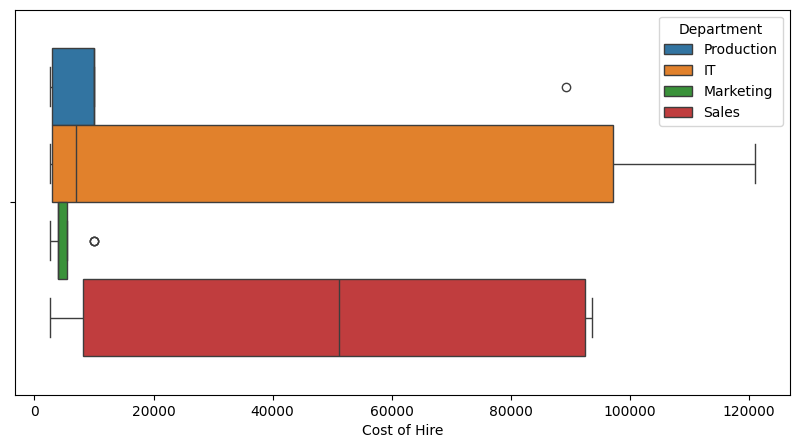

In [40]:
plt.figure(figsize =(10,5))
sns.boxplot(df, x ='Cost of Hire', hue = 'Department')
plt.show()

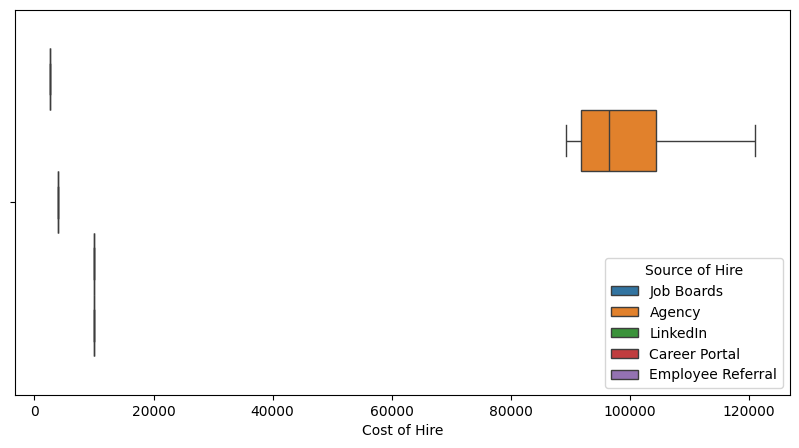

In [41]:
plt.figure(figsize =(10,5))
sns.boxplot(df, x ='Cost of Hire', hue = 'Source of Hire')
plt.show()

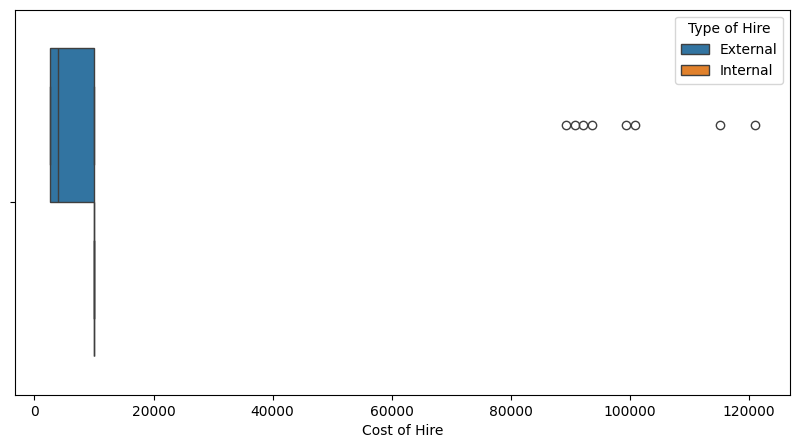

In [42]:
plt.figure(figsize =(10,5))
sns.boxplot(df, x ='Cost of Hire', hue = 'Type of Hire')
plt.show()

## Analyse Bivarié Quantitatives

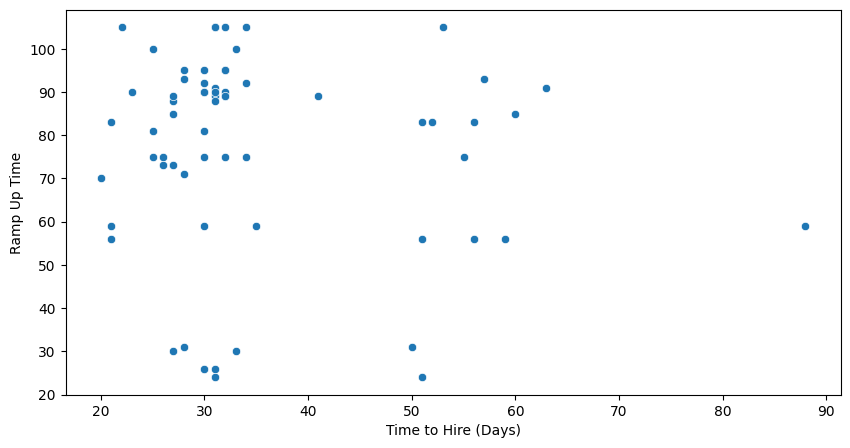

In [43]:
plt.figure(figsize=(10,5))
sns.scatterplot(df, x = 'Time to Hire (Days)', y = 'Ramp Up Time')
plt.show()

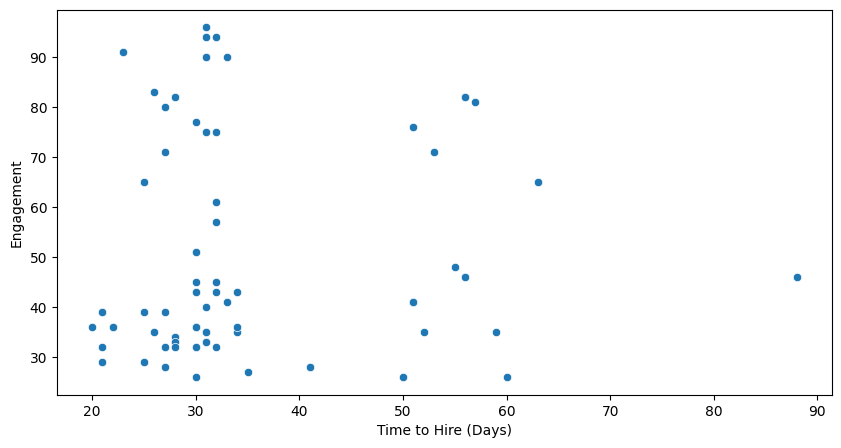

In [44]:
plt.figure(figsize=(10,5))
sns.scatterplot(df, x = 'Time to Hire (Days)', y = 'Engagement')
plt.show()

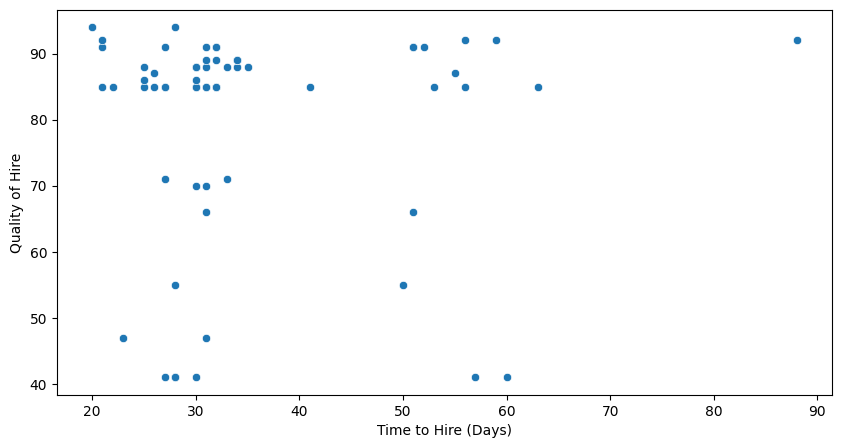

In [45]:
plt.figure(figsize=(10,5))
sns.scatterplot(df, x = 'Time to Hire (Days)', y = 'Quality of Hire')
plt.show()

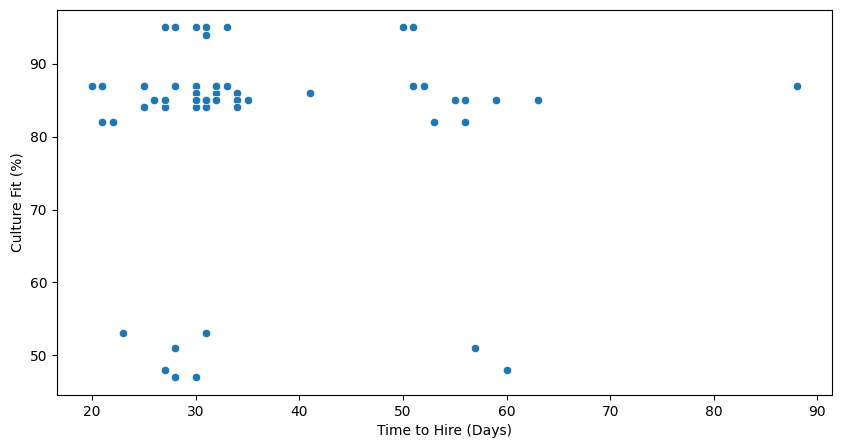

In [46]:
plt.figure(figsize=(10,5))
sns.scatterplot(df, x = 'Time to Hire (Days)', y = 'Culture Fit (%)')
plt.show()

## Analyse Multivarié

In [47]:
df_quant = df.select_dtypes(include = int)
df_quant = df_quant.drop(columns= 'Fiscal Year')

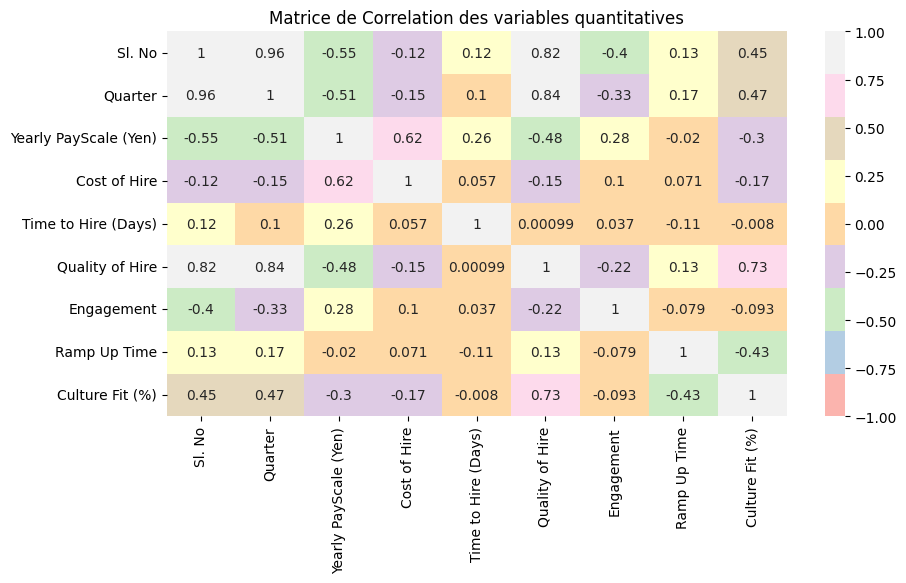

In [48]:
plt.figure(figsize = (10,5))
sns.heatmap(df_quant.corr(),vmin =-1, vmax= +1 , cmap= 'Pastel1', square = False, annot = True)
plt.title('Matrice de Correlation des variables quantitatives')
plt.show()


---


## c) Préparation des données (recodages, normalisations, etc.)

Les variables qualitatives peuvent être récodés de différentes façons : 
- Binaire : Sex ,  Type of Hire 
- One Hot Encoding : Source of Hire, Department, Job Title, Quarter 
- Multiclasse Ordinale : Performance Score

Modèle ANCOVA - Quant et Qual 
VIF - Multicolinéarité 


In [49]:
# Groups de Variables 
var_quant = df.select_dtypes(include= 'int').columns
var_date = ['Job Open Date', 'Hire Date']
var_quali = ['Department', 'Job Title', 'Source of Hire', 'Type of Hire', 'PerformanceScore', 'Sex']

* Standardisation Basique

In [50]:
w_values = [] 
for i in var_quant: 
    norm_fit_base = stats.shapiro(df[i])
    w_values.append(norm_fit_base.statistic) 
    print(f'La variable {i} a un W de {norm_fit_base.statistic}') 
sum_w = sum(w_values)
print(f"\nSomme des W pour la transformation en Scaled : {sum_w:.4f}") 

La variable Sl. No a un W de 0.9551290406738953
La variable Fiscal Year a un W de 1.0
La variable Quarter a un W de 0.8615216813015105
La variable Yearly PayScale (Yen) a un W de 0.9627292441994025
La variable Cost of Hire a un W de 0.48804487770845073
La variable Time to Hire (Days) a un W de 0.7928891380922993
La variable Quality of Hire a un W de 0.702202607568952
La variable Engagement a un W de 0.8463817282820911
La variable Ramp Up Time a un W de 0.8665021429889564
La variable Culture Fit (%) a un W de 0.622471109828972

Somme des W pour la transformation en Scaled : 8.0979


/Users/ezequielhurtado/Desktop/PROJETS/Econometrie Dimby/.venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


In [51]:
# Standardization --> La standardization semble plus pertinente que la normalisation dans le cadre d'une ANOVA. cf.GPT
scaler = StandardScaler()
var_to_standardize = ["Cost of Hire", "Culture Fit (%)", "Quality of Hire", 
                       "Time to Hire (Days)", "Engagement", "Quarter", "Ramp Up Time"]
df_scaled = df.copy()

In [52]:
df_scaled = scaler.fit_transform(df_scaled[var_to_standardize])
df_scaled =  pd.DataFrame(df_scaled, columns = var_to_standardize)
df_scaled.head()

,Cost of Hire,Culture Fit (%),Quality of Hire,Time to Hire (Days),Engagement,Quarter,Ramp Up Time
0,-0.489412,-2.761887,-2.38095,-0.410829,-0.242366,-1.612913,0.798634
1,2.263141,-2.761887,-2.38095,-0.565495,1.470837,-1.612913,0.798634
2,-0.445735,-2.683222,-2.38095,1.909148,-1.122119,-1.612913,0.359523
3,3.086477,-2.683222,-2.38095,-0.642827,-1.029513,-1.612913,0.359523
4,-0.255148,-2.447226,-2.38095,-0.565495,-0.751697,-1.612913,0.710812


In [53]:
w_values = [] 
for i in var_to_standardize: 
    norm_fit_scaled = stats.shapiro(df_scaled[i])
    w_values.append(norm_fit_scaled.statistic) 
    print(f'La variable {i} a un W de {norm_fit_scaled.statistic}') 
sum_w = sum(w_values)
print(f"\nSomme des W pour la transformation en Scaled : {sum_w:.4f}")

La variable Cost of Hire a un W de 0.48804487770845106
La variable Culture Fit (%) a un W de 0.6224711098289717
La variable Quality of Hire a un W de 0.702202607568952
La variable Time to Hire (Days) a un W de 0.7928891380922993
La variable Engagement a un W de 0.8463817282820909
La variable Quarter a un W de 0.8615216813015101
La variable Ramp Up Time a un W de 0.8665021429889564

Somme des W pour la transformation en Scaled : 5.1800


* Standardisation Log

In [54]:
df_scaled_log = df.copy()
for i in var_to_standardize: 
    df_scaled_log[i] = np.log1p(df[i])

In [55]:
df_scaled_log = pd.DataFrame(df_scaled_log,columns = var_to_standardize)
df_scaled_log.head()

,Cost of Hire,Culture Fit (%),Quality of Hire,Time to Hire (Days),Engagement,Quarter,Ramp Up Time
0,7.873217,3.871201,3.73767,3.433987,3.828641,0.693147,4.564348
1,11.399544,3.871201,3.73767,3.367296,4.418841,0.693147,4.564348
2,8.294300,3.891820,3.73767,4.110874,3.295837,0.693147,4.454347
3,11.654434,3.891820,3.73767,3.332205,3.367296,0.693147,4.454347
4,9.210440,3.951244,3.73767,3.367296,3.555348,0.693147,4.543295


In [56]:
w_values = [] 
for i in var_to_standardize: 
    norm_fit_log = stats.shapiro(df_scaled_log[i])
    w_values.append(norm_fit_log.statistic) 
    print(f'La variable {i} a un W de {norm_fit_log.statistic}') 
sum_w = sum(w_values)
print(f"\nSomme des W pour la transformation en log : {sum_w:.4f}")

La variable Cost of Hire a un W de 0.7730834359225216
La variable Culture Fit (%) a un W de 0.5739697660645473
La variable Quality of Hire a un W de 0.6537348554615449
La variable Time to Hire (Days) a un W de 0.8875274584143844
La variable Engagement a un W de 0.9006412109469445
La variable Quarter a un W de 0.8367417839946811
La variable Ramp Up Time a un W de 0.7570902034518016

Somme des W pour la transformation en log : 5.3828


* Standardization Sqrt 

In [57]:
df_scaled_sqrt = df.copy()
for i in var_to_standardize: 
    df_scaled_sqrt[i] = np.sqrt(df_scaled_sqrt[i])

In [58]:
df_scaled_sqrt = pd.DataFrame(df_scaled_log, columns = var_to_standardize)
df_scaled_sqrt

,Cost of Hire,Culture Fit (%),Quality of Hire,Time to Hire (Days),Engagement,Quarter,Ramp Up Time
0,7.873217,3.871201,3.737670,3.433987,3.828641,0.693147,4.564348
1,11.399544,3.871201,3.737670,3.367296,4.418841,0.693147,4.564348
2,8.294300,3.891820,3.737670,4.110874,3.295837,0.693147,4.454347
3,11.654434,3.891820,3.737670,3.332205,3.367296,0.693147,4.454347
4,9.210440,3.951244,3.737670,3.367296,3.555348,0.693147,4.543295
...,...,...,...,...,...,...,...
59,7.873217,4.477337,4.532599,4.488636,3.850148,1.609438,4.094345
60,8.294300,4.454347,4.532599,4.043051,3.850148,1.609438,4.043051
61,9.210440,4.454347,4.532599,4.094345,3.583519,1.609438,4.043051
62,9.210440,4.477337,4.553877,3.044522,3.610918,1.609438,4.262680


In [59]:
w_values = [] 
for i in var_to_standardize: 
    norm_fit_sqrt= stats.shapiro(df_scaled_sqrt[i])
    w_values.append(norm_fit_sqrt.statistic) 
    print(f'La variable {i} a un W de {norm_fit_log.statistic}') 
sum_w = sum(w_values)
print(f"\nSomme des W pour la transformation en sqrt : {sum_w:.4f}")

La variable Cost of Hire a un W de 0.7570902034518016
La variable Culture Fit (%) a un W de 0.7570902034518016
La variable Quality of Hire a un W de 0.7570902034518016
La variable Time to Hire (Days) a un W de 0.7570902034518016
La variable Engagement a un W de 0.7570902034518016
La variable Quarter a un W de 0.7570902034518016
La variable Ramp Up Time a un W de 0.7570902034518016

Somme des W pour la transformation en sqrt : 5.3828


* Standardization BoxCox

In [60]:
df_scaled_box = df.copy()

for i in var_to_standardize :
    df_scaled_box[i], _ = stats.boxcox(df_scaled_box[i] + 1)  # +1 pour éviter les zéros

df_scaled_box =  pd.DataFrame(df_scaled_box, columns = var_to_standardize)
df_scaled_box.head()

,Cost of Hire,Culture Fit (%),Quality of Hire,Time to Hire (Days),Engagement,Quarter,Ramp Up Time
0,1.795072,1.182887e+09,5.752975e+07,0.775632,1.146757,1.106464,11986.126323
1,1.815615,1.182887e+09,5.752975e+07,0.774753,1.165686,1.106464,11986.126323
2,1.800030,1.334615e+09,5.752975e+07,0.781364,1.119472,1.106464,9374.894512
3,1.816066,1.334615e+09,5.752975e+07,0.774259,1.123875,1.106464,9374.894512
4,1.807563,1.889758e+09,5.752975e+07,0.774753,1.134277,1.106464,11435.493424


In [61]:
w_values = [] 
for i in var_to_standardize: 
    norm_fit_box = stats.shapiro(df_scaled_box[i])
    w_values.append(norm_fit_box.statistic) 
    print(f'La variable {i} a un W de {norm_fit_box.statistic}') 
sum_w = sum(w_values)
print(f"\nSomme des W pour la transformation Box-Cox : {sum_w:.4f}")

La variable Cost of Hire a un W de 0.8604860037394088
La variable Culture Fit (%) a un W de 0.8125644391794867
La variable Quality of Hire a un W de 0.8544643085266577
La variable Time to Hire (Days) a un W de 0.9432234673954638
La variable Engagement a un W de 0.9298500572832479
La variable Quarter a un W de 0.8627979132043399
La variable Ramp Up Time a un W de 0.9377877788982929

Somme des W pour la transformation Box-Cox : 6.2012


* **Commentaire** : 
Le test de Shapiro donne les mêmes résultats, cela signifie que les données restent non normales après la standardisation.

In [86]:
df_remaining = df.drop(columns = var_to_standardize)
df_standardized = pd.concat([df_remaining, df_scaled], axis = 1)
df_standardized.head()

,Sl. No,Fiscal Year,Department,Job Open Date,Hire Date,Job Title,Source of Hire,Type of Hire,PerformanceScore,Sex,Yearly PayScale (Yen),Cost of Hire,Culture Fit (%),Quality of Hire,Time to Hire (Days),Engagement,Quarter,Ramp Up Time
0,1,2018,Production,04/01/2018,03/02/2018,Production Technician I,Job Boards,External,Fully Meets,F,744000,-0.489412,-2.761887,-2.38095,-0.410829,-0.242366,-1.612913,0.798634
1,2,2018,Production,05/01/2018,02/02/2018,Production Technician I,Agency,External,Fully Meets,F,744000,2.263141,-2.761887,-2.38095,-0.565495,1.470837,-1.612913,0.798634
2,3,2018,Production,04/02/2018,05/04/2018,Production Technician I,LinkedIn,External,Exceeds,F,660000,-0.445735,-2.683222,-2.38095,1.909148,-1.122119,-1.612913,0.359523
3,4,2018,IT,04/02/2018,03/03/2018,Software Engineer,Agency,External,Fully Meets,F,960000,3.086477,-2.683222,-2.38095,-0.642827,-1.029513,-1.612913,0.359523
4,5,2018,Production,04/02/2018,04/03/2018,Production Technician I,Career Portal,External,Fully Meets,M,660000,-0.255148,-2.447226,-2.38095,-0.565495,-0.751697,-1.612913,0.710812


In [92]:
var_quali_encoded = ['Department', 'Job Title', 'Source of Hire', 'Type of Hire']

In [93]:
# I ere étape OHE. 
df_standardized_OHE = pd.get_dummies(df_standardized, columns =var_quali, drop_first=True)
print(df_standardized_OHE.columns)

Index(['Sl. No', 'Fiscal Year', 'Job Open Date', 'Hire Date',
       'Yearly PayScale (Yen)', 'Cost of Hire', 'Culture Fit (%)',
       'Quality of Hire', 'Time to Hire (Days)', 'Engagement', 'Quarter',
       'Ramp Up Time', 'Department_Marketing', 'Department_Production',
       'Department_Sales', 'Job Title_Marketing Analyst',
       'Job Title_Production Manager', 'Job Title_Production Technician I',
       'Job Title_Software Engineer', 'Job Title_Sr. Network Engineer',
       'Job Title_Sr. Sales Engineer', 'Source of Hire_Career Portal',
       'Source of Hire_Employee Referral', 'Source of Hire_Job Boards',
       'Source of Hire_LinkedIn', 'Type of Hire_Internal',
       'PerformanceScore_Fully Meets', 'PerformanceScore_Needs Improvement',
       'PerformanceScore_PIP', 'Sex_M '],
      dtype='object')


In [94]:
var_date.append('Fiscal Year')

In [95]:
df_encoded_wo_date = df_standardized_OHE.drop(columns = var_date)
corr_matrix = df_encoded_wo_date.corr()

In [96]:
# II eme Étape OHE 
df_encoded_ = df_standardized_OHE.applymap(lambda x : 1 if x is True else (0 if x is False else x))

# Pas de changement dans Matrice de Correlation si Avant ou Après.

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_51334/360109925.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_encoded_ = df_standardized_OHE.applymap(lambda x : 1 if x is True else (0 if x is False else x))


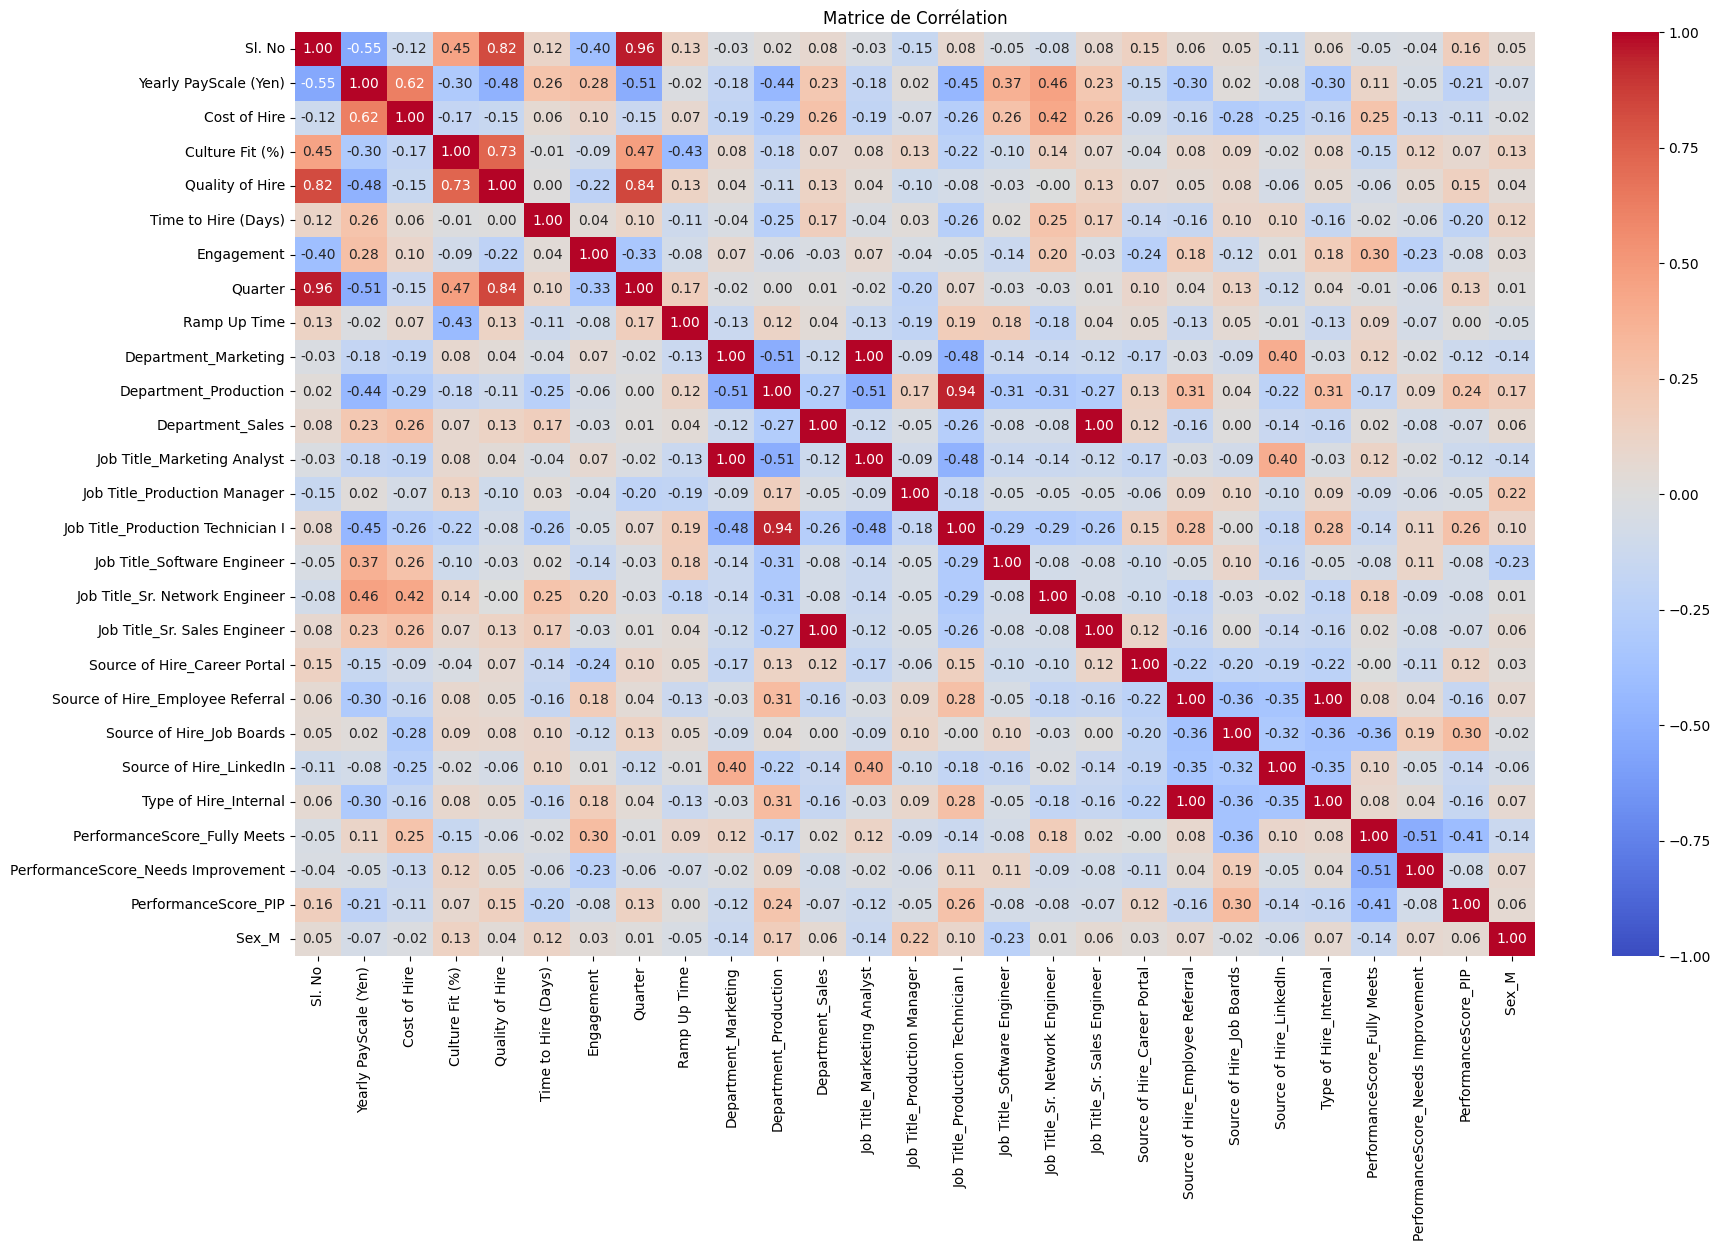

In [97]:
plt.figure(figsize=(20,12))
sns.heatmap(corr_matrix, annot = True , cmap = 'coolwarm', 
            fmt='.2f',vmin = -1,vmax =1)
plt.title("Matrice de Corrélation")
plt.show()
#Fiscal Year : les éléments d'une colonne ont la même valeur,
#  la corrélation ne peut pas être calculée

* Encodage Ordinal 

In [98]:
ordinal_cat = [['PIP','Needs Improvement','Fully Meets','Exceeds']]
encoder = OrdinalEncoder(categories= ordinal_cat)
df_standardized['PerformanceScore'] = encoder.fit_transform(df_standardized[['PerformanceScore']])

* Encodage Binaire 

In [99]:
encoder = LabelEncoder()
df_standardized['Sex']= encoder.fit_transform(df_standardized['Sex'])

In [100]:
df_standardized.columns

Index(['Sl. No', 'Fiscal Year', 'Department', 'Job Open Date', 'Hire Date',
       'Job Title', 'Source of Hire', 'Type of Hire', 'PerformanceScore',
       'Sex', 'Yearly PayScale (Yen)', 'Cost of Hire', 'Culture Fit (%)',
       'Quality of Hire', 'Time to Hire (Days)', 'Engagement', 'Quarter',
       'Ramp Up Time'],
      dtype='object')

Pour analyser les corrélations dans ton correlogramme :

1.Variables explicatives corrélées entre elles
- Yearly PayScale (Yen)" et "Cost of Hire" ont une forte corrélation positive (0.62).
- Quality of Hire est fortement corrélée avec Culture Fit (%) (0.73).
- Engagement et Quality of Hire sont aussi bien corrélés (0.84).
- Quarter" et Sl. No. sont quasi parfaitement corrélés (0.96), probablement parce que Sl. No. est un identifiant séquentiel.

2.Corrélations avec les variables cibles :
 
   - Cost of Hire :
     - Fortement corrélée avec "Yearly PayScale (Yen)" (0.62), ce qui est logique.
     - Modérément corrélée avec "Culture Fit (%)" (0.26).
   - Quality of Hire:
     - Très corrélée avec "Culture Fit (%)" (0.73) et "Engagement" (0.84), ce qui suggère que ces variables influencent fortement la qualité des recrutements.
   - Time to Hire (Days) :
     - Peu de corrélations marquées, mais on voit des liens modérés avec "Performance Score" (0.27) et "Quarter" (0.30).
On peut voir que des catégories sont corrélées presque a 1 commme job title production avec departmenent production ce qui est normale.

Pour que la variable ait un impact entre la variable cible et la variable explicative, il faut qu'il y ait une corrélation entre 0,3 à 0,7.

Pour la variable Cost to Hire, nous pouvons voir que Yearly PayScale (Yen)

In [101]:

df_encoded_[var_date[0]] = pd.to_datetime(df_encoded_[var_date[0]], errors= 'coerce')
df_encoded_[var_date[1]] = pd.to_datetime(df_encoded_[var_date[1]], errors= 'coerce')
df_encoded_[var_date].dtypes

Job Open Date    datetime64[ns]
Hire Date        datetime64[ns]
Fiscal Year               int64
Fiscal Year               int64
Fiscal Year               int64
Fiscal Year               int64
Fiscal Year               int64
Fiscal Year               int64
dtype: object

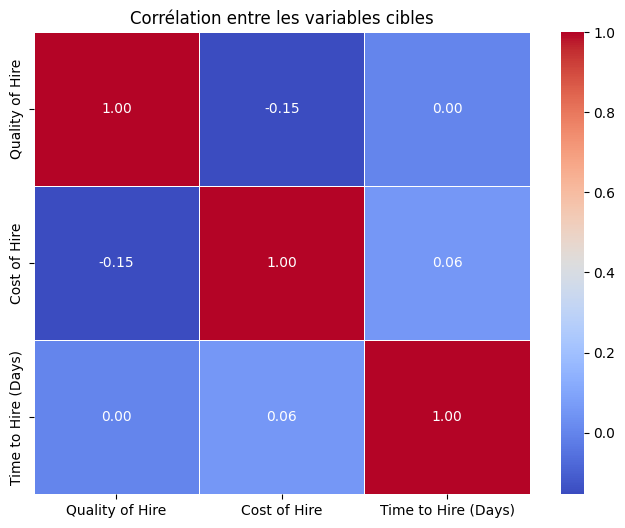

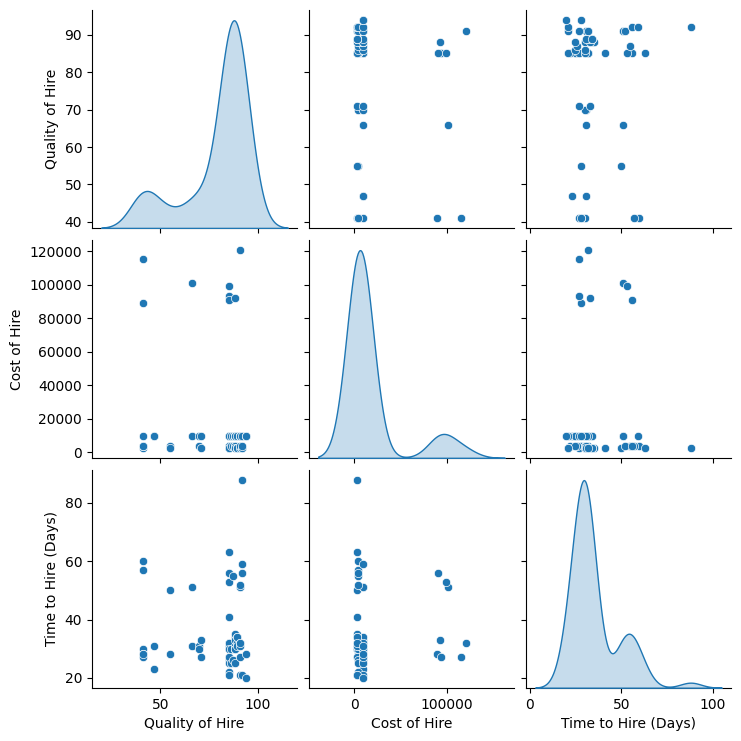

In [102]:
target_vars = ["Quality of Hire", "Cost of Hire", "Time to Hire (Days)"]

# Calcul de la matrice de corrélation
corr_matrix = df[target_vars].corr()

# Affichage de la heatmap des corrélations
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Corrélation entre les variables cibles")
plt.show()

# Affichage des scatter plots pour voir les relations
sns.pairplot(df[target_vars], diag_kind="kde")
plt.show()

A ce stade plusieurs commandes comme le VIF ou celle qui est ci-dessus n'ont pas été utilisées.


---


### **TEST ANOVA**
- H0 : Categories de variable indépendante seront sans effet sur variable dépendante.
- H1 : Cela signifie que l'une ou plusieurs des moyennes de groupe diffèrent des autres.

In [103]:
var_quali_renamed =  ['Department', 'Job_Title', 'Source_of_Hire', 'Type_of_Hire', 'PerformanceScore', 'Sex']
df = df.rename(columns={"Time to Hire (Days)": "Time_to_Hire_Days"})
df = df.rename(columns={"Job Title": "Job_Title"})
df = df.rename(columns={"Source of Hire": "Source_of_Hire"})
df = df.rename(columns={"Type of Hire": "Type_of_Hire"})
df = df.rename(columns={"Cost of Hire": "Cost_of_Hire"})
df = df.rename(columns={"Quality of Hire": "Quality_of_Hire"})

target_days = 'Time_to_Hire_Days'

* Test **ANOVA** pour la variable **Time to Hire Days**

In [104]:
print("ANOVA à 1 facteur :")
for var in var_quali_renamed:
    print(f"\nEffet de {var} sur {target_days} :")
    formula = f"{target_days} ~ C({var})"
    model = smf.ols(formula=formula, data=df).fit()
    anova_results = anova_lm(model)
    print(anova_results)

ANOVA à 1 facteur :

Effet de Department sur Time_to_Hire_Days :
                 df       sum_sq     mean_sq         F    PR(>F)
C(Department)   3.0  1052.892157  350.964052  2.182418  0.099404
Residual       60.0  9648.857843  160.814297       NaN       NaN

Effet de Job_Title sur Time_to_Hire_Days :
                df       sum_sq     mean_sq         F    PR(>F)
C(Job_Title)   6.0  1393.883333  232.313889  1.422656  0.221947
Residual      57.0  9307.866667  163.295906       NaN       NaN

Effet de Source_of_Hire sur Time_to_Hire_Days :
                     df        sum_sq     mean_sq         F    PR(>F)
C(Source_of_Hire)   4.0    627.997222  156.999306  0.919514  0.458739
Residual           59.0  10073.752778  170.741573       NaN       NaN

Effet de Type_of_Hire sur Time_to_Hire_Days :
                   df        sum_sq     mean_sq         F   PR(>F)
C(Type_of_Hire)   1.0    265.653382  265.653382  1.578225  0.21373
Residual         62.0  10436.096618  168.324139       NaN      N

Nous pouvons voir qu'aucune des variables categories de variable indépendante seront sans effet sur variable dépendante.

In [123]:
print("\n\nANOVA à 2 facteurs (avec interactions) :")
for var1, var2 in itertools.combinations(var_quali_renamed, 2):
    print(f"\nEffet de {var1}, {var2} et leur interaction sur {target_days} :")
    formula = f"{target_days} ~ C({var1}) + C({var2}) + C({var1}):C({var2})"
    model = smf.ols(formula=formula, data=df).fit()
    anova_results = anova_lm(model)
    print(anova_results)



ANOVA à 2 facteurs (avec interactions) :

Effet de Department, Job_Title et leur interaction sur Time_to_Hire_Days :
                              df       sum_sq     mean_sq         F    PR(>F)
C(Department)                3.0  1052.892157  350.964052  2.149252  0.104028
C(Job_Title)                 6.0   412.415265   68.735878  0.420928  0.862076
C(Department):C(Job_Title)  18.0  2019.325620  112.184757  0.687003  0.809286
Residual                    57.0  9307.866667  163.295906       NaN       NaN

Effet de Department, Source_of_Hire et leur interaction sur Time_to_Hire_Days :
                                   df       sum_sq     mean_sq         F  \
C(Department)                     3.0  1052.892157  350.964052  2.777477   
C(Source_of_Hire)                 4.0   495.113106  123.778277  0.979563   
C(Department):C(Source_of_Hire)  12.0  3364.792386  280.399366  2.219039   
Residual                         48.0  6065.315079  126.360731       NaN   

                             

* Test **ANOVA** pour la variable **Cost of Hire**

In [106]:
var_quali_renamed =  ['Department', 'Job_Title', 'Source_of_Hire', 'Type_of_Hire', 'PerformanceScore', 'Sex']
target_cost = 'Cost_of_Hire'
print("ANOVA à 1 facteur :")
for var in var_quali_renamed:
    print(f"\nEffet de {var} sur {target_cost} :")
    formula = f"{target_cost} ~ C({var})"
    model = smf.ols(formula=formula, data=df).fit()
    anova_results = anova_lm(model)
    print(anova_results)

ANOVA à 1 facteur :

Effet de Department sur Cost_of_Hire :
                 df        sum_sq       mean_sq         F    PR(>F)
C(Department)   3.0  1.559798e+10  5.199327e+09  6.521959  0.000683
Residual       60.0  4.783220e+10  7.972033e+08       NaN       NaN

Effet de Job_Title sur Cost_of_Hire :
                df        sum_sq       mean_sq         F    PR(>F)
C(Job_Title)   6.0  2.348431e+10  3.914051e+09  5.585081  0.000131
Residual      57.0  3.994587e+10  7.008047e+08       NaN       NaN

Effet de Source_of_Hire sur Cost_of_Hire :
                     df        sum_sq       mean_sq           F        PR(>F)
C(Source_of_Hire)   4.0  6.245584e+10  1.561396e+10  945.491815  9.482778e-53
Residual           59.0  9.743328e+08  1.651412e+07         NaN           NaN

Effet de Type_of_Hire sur Cost_of_Hire :
                   df        sum_sq       mean_sq         F    PR(>F)
C(Type_of_Hire)   1.0  1.615832e+09  1.615832e+09  1.620685  0.207749
Residual         62.0  6.181434e+10 

In [120]:
# Test de Tukey sur Department, Job Titile et Source of Hire 
# C'est un test statistique post-hoc utilisé après une ANOVA pour comparer les moyennes
# de plusieurs groupes tout en contrôlant le risque d’erreur de type I. Il identifie 
# quelles paires de groupes ont des différences statistiquement significatives. Il repose 
# sur la distribution de Studentisée à range (Studentized Range Distribution). C'est 
# particulièrement utile lorsqu'on a plus de deux groupes à comparer après une ANOVA significative

var_quali_ch_tukey =  ['Department', 'Job_Title', 'Source_of_Hire']
target_cost = 'Cost_of_Hire'
print("ANOVA à 1 facteur :")
for var in var_quali_ch_tukey:
    print(f"\nEffet de {var} sur {target_cost} :")
    formula = f"{target_cost} ~ C({var})"
    model = smf.ols(formula=formula, data=df).fit()
    tukey_test = pairwise_tukeyhsd(df[target_cost], groups = df[var],alpha=0.05)
    anova_results = anova_lm(model)
    print(anova_results)
    print(tukey_test)

ANOVA à 1 facteur :

Effet de Department sur Cost_of_Hire :
                 df        sum_sq       mean_sq         F    PR(>F)
C(Department)   3.0  1.559798e+10  5.199327e+09  6.521959  0.000683
Residual       60.0  4.783220e+10  7.972033e+08       NaN       NaN
         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
  group1     group2     meandiff  p-adj     lower      upper    reject
----------------------------------------------------------------------
        IT  Marketing -35410.5952 0.0119 -64762.4151 -6058.7754   True
        IT Production -31184.2227 0.0051 -54877.2275 -7491.2179   True
        IT      Sales   8914.8214 0.9443 -33385.6531  51215.296  False
 Marketing Production   4226.3725 0.9702 -20826.1715 29278.9166  False
 Marketing      Sales  44325.4167 0.0414   1248.7219 87402.1115   True
Production      Sales  40099.0441 0.0449    660.0941 79537.9942   True
----------------------------------------------------------------------

Effet de Job_Title sur Co

Nous pouvons voir que 3 variables ont une influence sur la variable Cost_of_Hire. Il y a la variable Department, Job_Title et Source_of_Hire ce qui semble coherent.

In [107]:
print("\n\nANOVA à 2 facteurs (avec interactions) :")
for var1, var2 in itertools.combinations(var_quali_renamed, 2):
    print(f"\nEffet de {var1}, {var2} et leur interaction sur {target_cost} :")
    formula = f"{target_cost} ~ C({var1}) + C({var2}) + C({var1}):C({var2})"
    model = smf.ols(formula=formula, data=df).fit()
    anova_results = anova_lm(model)
    print(anova_results)



ANOVA à 2 facteurs (avec interactions) :

Effet de Department, Job_Title et leur interaction sur Cost_of_Hire :
                              df        sum_sq       mean_sq         F  \
C(Department)                3.0  1.559798e+10  5.199327e+09  7.419081   
C(Job_Title)                 6.0  1.702723e+10  2.837871e+09  4.049446   
C(Department):C(Job_Title)  18.0  1.127022e+10  6.261232e+08  0.893435   
Residual                    57.0  3.994587e+10  7.008047e+08       NaN   

                              PR(>F)  
C(Department)               0.000280  
C(Job_Title)                0.001897  
C(Department):C(Job_Title)  0.588220  
Residual                         NaN  

Effet de Department, Source_of_Hire et leur interaction sur Cost_of_Hire :
                                   df        sum_sq       mean_sq           F  \
C(Department)                     3.0  1.559798e+10  5.199327e+09  407.567863   
C(Source_of_Hire)                 4.0  4.696725e+10  1.174181e+10  920.424018   
C

ici, on peut voir que C(Department):C(Source_of_Hire), C(Job_Title):C(Source_of_Hire), C(Source_of_Hire):C(Type_of_Hire), C(Source_of_Hire):C(PerformanceScore), C(Source_of_Hire):C(PerformanceScore) , C(Source_of_Hire):C(Sex) sont significatifs.

C(Department) : C(Source_of_Hire)
   → L'impact du département sur le coût d'embauche dépend de la source de recrutement. Certains départements peuvent avoir des coûts de recrutement plus élevés selon qu'ils recrutent via LinkedIn, des recommandations internes, etc.  

C(Job_Title) : C(Source_of_Hire)
   → Le coût d'embauche varie selon le poste et la source de recrutement. Certains postes sont plus coûteux à recruter via certaines sources.  

C(Source_of_Hire) : C(Type_of_Hire)*
   → Le type de recrutement (interne, externe) influe sur le coût, mais cet effet varie en fonction de la source de recrutement. Un recrutement interne via LinkedIn pourrait être plus ou moins coûteux qu’un recrutement externe via un job board.  

C(Source_of_Hire) : C(PerformanceScore) 
   → Le coût d’embauche pourrait être lié aux performances futures des employés recrutés via différentes sources. Certaines sources de recrutement mènent peut-être à de meilleures performances (et donc un meilleur retour sur investissement en termes de coût d’embauche).  

C(Source_of_Hire) : C(Sex)*
   → La source de recrutement pourrait être corrélée à une différence de coût selon le genre des employés recrutés. Cela peut être dû à des différences dans les types de postes occupés ou les négociations salariales selon la source.  

* Test **ANOVA** pour la variable **Quality of Hire**

In [108]:
var_quali_renamed =  ['Department', 'Job_Title', 'Source_of_Hire', 'Type_of_Hire', 'PerformanceScore', 'Sex']
target_quality = 'Quality_of_Hire'
print("ANOVA à 1 facteur :")
for var in var_quali_renamed:
    print(f"\nEffet de {var} sur {target_quality} :")
    formula = f"{target_quality} ~ C({var})"
    model = smf.ols(formula=formula, data=df).fit()
    anova_results = anova_lm(model)
    print(anova_results)

ANOVA à 1 facteur :

Effet de Department sur Quality_of_Hire :
                 df        sum_sq     mean_sq         F    PR(>F)
C(Department)   3.0    385.108543  128.369514  0.472681  0.702462
Residual       60.0  16294.641457  271.577358       NaN       NaN

Effet de Job_Title sur Quality_of_Hire :
                df        sum_sq     mean_sq         F    PR(>F)
C(Job_Title)   6.0    623.214583  103.869097  0.368731  0.895784
Residual      57.0  16056.535417  281.693604       NaN       NaN

Effet de Source_of_Hire sur Quality_of_Hire :
                     df        sum_sq     mean_sq         F    PR(>F)
C(Source_of_Hire)   4.0    587.887103  146.971776  0.538865  0.707735
Residual           59.0  16091.862897  272.743439       NaN       NaN

Effet de Type_of_Hire sur Quality_of_Hire :
                   df        sum_sq     mean_sq         F    PR(>F)
C(Type_of_Hire)   1.0     41.334541   41.334541  0.154026  0.696064
Residual         62.0  16638.415459  268.361540       NaN       

In [109]:
print("\n\nANOVA à 2 facteurs (avec interactions) :")
for var1, var2 in itertools.combinations(var_quali_renamed, 2):
    print(f"\nEffet de {var1}, {var2} et leur interaction sur {target_quality} :")
    formula = f"{target_quality} ~ C({var1}) + C({var2}) + C({var1}):C({var2})"
    model = smf.ols(formula=formula, data=df).fit()
    anova_results = anova_lm(model)
    print(anova_results)



ANOVA à 2 facteurs (avec interactions) :

Effet de Department, Job_Title et leur interaction sur Quality_of_Hire :
                              df        sum_sq     mean_sq         F    PR(>F)
C(Department)                3.0    385.108543  128.369514  0.455706  0.714296
C(Job_Title)                 6.0   4128.125906  688.020984  2.442444  0.035939
C(Department):C(Job_Title)  18.0   6962.688577  386.816032  1.373180  0.181042
Residual                    57.0  16056.535417  281.693604       NaN       NaN

Effet de Department, Source_of_Hire et leur interaction sur Quality_of_Hire :
                                   df        sum_sq     mean_sq         F  \
C(Department)                     3.0    385.108543  128.369514  0.558600   
C(Source_of_Hire)                 4.0   1248.650956  312.162739  1.358375   
C(Department):C(Source_of_Hire)  12.0   6160.344276  513.362023  2.233893   
Residual                         48.0  11030.685714  229.805952       NaN   

                       

C(Department):C(Job_Title), C(Department):C(Type_of_Hire), C(Department):C(Source_of_Hire), C(Source_of_Hire):C(Type_of_Hire), C(Job_Title):C(Type_of_Hire), C(Job_Title):C(Source_of_Hire)

C(Department):C(Job_Title) : l'effet du titre du poste sur la qualité de l'embauche varie selon le departement. 
On peut avoir certains departement qui peuvent recruter des profils spécifiques qui influencent la qualité de l'embauche.

Ex : un Software Engineer peut être plus performant dans un département R&D qu'en Production.

C(Department):C(Type_of_Hire) : l'impact du type d’embauche (interne, externe) sur la qualité de l’embauche dépend du département.

ex : recrutement interne pour certains services peut etre plus bénéfique car la personne interne recruté aura plus de connaissances alors que dans certains departement, on aura tendance à privileger les personne externe qui seront apporter du nouveau aux services. 

C(Department):C(Source_of_Hire) : l'effacité de la source de recrutement varie en fonction du departement. 

Pour certains departement comme la Tech, les recrutements via Linkedin seront de meilleurs qualités alors que les recrutements via d'autres plateformes sont meilleurs pour la Production.

C(Source_of_Hire):C(Type_of_Hire) : l'interaction indique que la qualité de l'embauche dépend à la fois de la source de recrutement et du type d'mbauche.

Ex : recrutement interne via des recommandations peut etre meilleures que des plateformes. 

C(Job_Title):C(Type_of_Hire) : le type d'embauche influence la qualité de l'embauche, mais cet effet dépend aussi du titre du poste. 

Ex : Un Senior Sales Engineer embauché en interne peut être plus performant qu’un Junior Sales Engineer recruté à l’externe.


**CONCLUSION** pour Quality_of_Hire: on peut tester un modèle avec interactions explicites ( ex: arbre de décision, XGBoost)

variable catégorielles : Department, Job Title, Type of Hire et Source of Hire
variable quantitatives : Culture Fit, Engagement, Yearly PayScale, Time to Hire

## d) Définition et estimation du modèle explicatif et/oi prédictif à partir des données.

Suivre le cours (Independance et Selection de Variables)

## e) Évaluation, diagnostic et vérification de la qualité du modèle et affinage.

## f) Intérpretaion, bilan et conclusion.